# Optimization of Nueral Networks Using Particle Swarm Optimization

### [References : Particle swarm optimization of a neural network model in a machining process(IAS)](https://www.ias.ac.in/public/Volumes/sadh/039/03/0533-0548.pdf)

## Importing Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

### Checking GPU Accelaration

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Reading Processed Dataset

#### processed version of bank_loan_dataset from  [Neural Nets optimization using GA](https://github.com/Surya443/Evolutionary-ANNs-CIA-2-/blob/main/ANN(ga).ipynb)

In [3]:
df = pd.read_csv('processed.csv')

### Defining Target Variable

In [4]:
x = df.drop('Personal Loan',axis = 1)
x = df.drop('Unnamed: 0',axis = 1)
y = df['Personal Loan']

In [5]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### Scaling X values

In [6]:
std = StandardScaler()
x_std= std.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.33, random_state=42, stratify = y)

### Defining the Architecture of Neural Nets

In [7]:
model = Sequential()
model.add(Dense(12, input_shape=(12,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


### Defining Fitness Function

In [8]:
import pygad.kerasga
def fitness_function(weights,index):
    global x,y,model
    
    model_wt_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                            weights_vector=weights)
    
    model.set_weights(weights = model_wt_matrix)
    
    prediction = model.predict(x)
    
    bce = tf.keras.losses.BinaryCrossentropy()
    
    error = bce(y,prediction).numpy()
    
    fitness = 1.0/(error + 0.0000001)
    
    return fitness

## Defining PSO-Optimizer

### Using

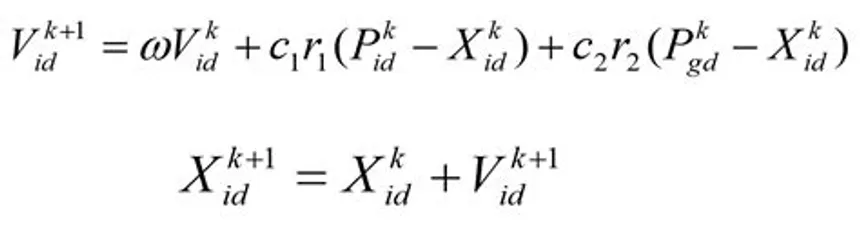

In [9]:
def pso():
    # Define the search space for PSO (i.e., the bounds on the weights)
    lb = -1
    ub = 1
    num_particles = 5
    num_iterations = 10
    
    # Initialize the particles
    particles = np.random.uniform(low=lb, high=ub, size=(num_particles, model.count_params()))
    velocities = np.zeros_like(particles)
    fitnesses = np.zeros(num_particles)
    best_positions = particles.copy()
    best_fitnesses = np.zeros(num_particles)
    global_best_position = particles[0].copy()
    global_best_fitness = 0
    
    # Evaluate the fitness of each particle
    for i in range(num_particles):
        fitness = fitness_function(particles[i], i)
        fitnesses[i] = fitness
        if fitness > fitnesses[i]:
            best_positions[i] = positions[i].copy()
            
    # Run PSO for num_iterations iterations
    for iteration in range(num_iterations):
        # Update the velocities and positions of the particles
        for i in range(num_particles):
            
            # Update the velocity
            inertia_weight = 0.7
            cognitive_weight = 1.5
            social_weight = 1.5
            r1 = np.random.rand(model.count_params())
            r2 = np.random.rand(model.count_params())
            
            #Swarm Optimization Formula
            velocities[i] = (inertia_weight * velocities[i]
                             + cognitive_weight * r1 * (best_positions[i] - particles[i])
                             + social_weight * r2 * (global_best_position - particles[i]))
            
            # Update the position
            particles[i] = particles[i] + velocities[i]
            # Ensure that the position is within the search space
            particles[i] = np.clip(particles[i], lb, ub)
            
            # Evaluate the fitness of the particle and update the best position and fitness if necessary
            for i in range(num_particles):
                fitness = fitness_function(particles[i], i)
                if fitness > fitnesses[i]:
                    fitnesses[i] = fitness
                    best_positions[i] = particles[i].copy()
                    if fitness > global_best_fitness:
                        global_best_position = best_positions[i].copy()
                        global_best_fitness = fitness
        
                    
        # Print the best fitness 
        print("Iteration:", iteration, "Best fitness:", global_best_fitness)
    # Return the best solution found by PSO
    return global_best_position

### Setting the Best weight to our Model

In [11]:
best_weights = pso()
best_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model, weights_vector=best_weights)
model.set_weights(weights=best_weights_matrix)

148/148 [==============================] - 0s 1ms/step
Iteration: 0 Best fitness: 0.07949785497685675
148/148 [==============================] - 0s 954us/step
Iteration: 1 Best fitness: 0.07949785497685675
148/148 [==============================] - 0s 924us/step
Iteration: 2 Best fitness: 0.08770436968660907
148/148 [==============================] - 0s 928us/step
Iteration: 3 Best fitness: 0.8098326062290784
148/148 [==============================] - 0s 940us/step
Iteration: 4 Best fitness: 0.8098326062290784
148/148 [==============================] - 0s 942us/step
Iteration: 5 Best fitness: 0.8179986572271104
148/148 [==============================] - 0s 849us/step
Iteration: 6 Best fitness: 0.8179986572271104
148/148 [==============================] - 0s 1ms/step
Iteration: 7 Best fitness: 0.8179986572271104
148/148 [==============================] - 0s 855us/step
Iteration: 8 Best fitness: 0.87480789524318
148/148 [==============================] - 0s 877us/step
Iteration: 9 Best f

In [13]:
predictions = model.predict(x_test)

49/49 [==============================] - 0s 1ms/step


### Finding Accuracy and Binary Loss

In [24]:
bce = tf.keras.losses.BinaryCrossentropy()
print("Binary Loss : ",bce(y,predictions).numpy(),end = '\n')
tf_y_pred = predictions>0.5
accuracy = accuracy_score(y_test,tf_y_pred)
print("Accuracy : {:f} Percent".format(accuracy*100))

Binary Loss :  0.52181375
Accuracy : 89.575290 Percent
